In [1]:
# Data and plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold

# Models
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model

# Metrics
from sklearn import metrics

# import my functions
from help_functions import *
from churn_modelling import *

# Export model
import pickle
from sklearn.externals import joblib

C:\Users\johnyvallejo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# Data ingestion

Ingest data from the ```.csv``` and ```.xlsx``` files and storage (temporarily) as a ```Pandas``` object.

+ **data_train:** data labeled for train model.
+ **data_test:** data without label for predict the customer churn.

In [2]:
data_test = pd.read_excel('.data\Test sample No Label.xlsx')
data_train = pd.read_csv('.data\Train Set.csv')

# EDA

In this section we're an Exploratory Data Analysis

In [3]:
print("Dataset with {:,.0f} observations and {:,.0f} variables.".format(data_train.shape[0], data_train.shape[1]-1))
data_train.head()

Dataset with 6,143 observations and 20 variables.


customerID gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     A00001   Male              0     Yes        Yes      66          Yes   
1     A00002   Male              0      No         No      29          Yes   
2     A00003   Male              0      No         No       9          Yes   
3     A00004   Male              1     Yes        Yes      26          Yes   
4     A00005   Male              0     Yes        Yes      55          Yes   

  MultipleLines InternetService       OnlineSecurity  ...  \
0           Yes             DSL                   No  ...   
1            No              No  No internet service  ...   
2            No     Fiber optic                   No  ...   
3           Yes     Fiber optic                   No  ...   
4            No              No  No internet service  ...   

      DeviceProtection          TechSupport          StreamingTV  \
0                  Yes                   No                  Yes   
1  No internet service  No internet service  No internet service   
2                   No                   No                   No   
3                  Yes                   No                  Yes   
4  No internet service  No internet service  No internet service   

       StreamingMovies        Contract PaperlessBilling  \
0                  Yes        Two year               No   
1  No internet service        One year              Yes   
2                   No  Month-to-month              Yes   
3                  Yes  Month-to-month               No   
4  No internet service        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Bank transfer (automatic)          79.85       5234.95    No  
1               Mailed check          19.80         572.2    No  
2           Electronic check          70.50         597.9    No  
3           Electronic check         105.75       2710.25   Yes  
4               Mailed check          19.50       1026.35    No  

[5 rows x 21 columns]

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6143 entries, 0 to 6142
Data columns (total 21 columns):
customerID          6143 non-null object
gender              6143 non-null object
SeniorCitizen       6143 non-null int64
Partner             6143 non-null object
Dependents          6143 non-null object
tenure              6143 non-null int64
PhoneService        6143 non-null object
MultipleLines       6143 non-null object
InternetService     6143 non-null object
OnlineSecurity      6143 non-null object
OnlineBackup        6143 non-null object
DeviceProtection    6143 non-null object
TechSupport         6143 non-null object
StreamingTV         6143 non-null object
StreamingMovies     6143 non-null object
Contract            6143 non-null object
PaperlessBilling    6143 non-null object
PaymentMethod       6143 non-null object
MonthlyCharges      6143 non-null float64
TotalCharges        6143 non-null object
Churn               6143 non-null object
dtypes: float64(1), int64(2), obj

We've see that the first column, *customerID*, is not a variable. So, we've 19 variables in the dataset.

## Describe dataset

The 19 variables and the scope *Churn* are:

+ **customerID:** Customer ID
+ **gender:** Whether the customer is a male or a female
+ **SeniorCitizen:** 
Whether the customer is a senior citizen or not (1, 0)
+ **Partner:** 
Whether the customer has a partner or not (Yes, No)
+ **Dependents:** 
Whether the customer has dependents or not (Yes, No)
+ **tenure:** 
Number of months the customer has stayed with the company
+ **PhoneService:** 
Whether the customer has phone service or not (Yes, No)
+ **MultipleLines:** 
Whether the customer has multiple lines or not (Yes, No, No phone service)
+ **InternetService:**
Customer’s internet service provider (DSL, Fiber optic, No)
+ **OnlineSecurity:** 
Whether the customer has online security or not (Yes, No, No internet service)
+ **OnlineBackup:** 
Whether the customer has an online backup or not (Yes, No, No internet service)
+ **DeviceProtection:** 
Whether the customer has device protection or not (Yes, No, No internet service)
+ **TechSupport:** 
Whether the customer has tech support or not (Yes, No, No internet service)
+ **StreamingTV:** 
Whether the customer has streaming TV or not (Yes, No, No internet service)
+ **StreamingMovies:** 
Whether the customer has streaming movies or not (Yes, No, No internet service)
+ **Contract:** 
The contract term of the customer (Month-to-month, One year, Two year)
+ **PaperlessBilling:** 
Whether the customer has paperless billing or not (Yes, No)
+ **PaymentMethod:** 
The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
+ **MonthlyCharges:** 
The amount charged to the customer monthly in USD
+ **TotalCharges:** 
The total lifetime amount charged to the customer in USD
+ **Churn:** 
Whether the customer churned or not (Yes or No)

In [5]:
print("Total customers in the dataset: {:,.0f}".format(data_train.customerID.nunique()))

Total customers in the dataset: 6,143


There isn't customers with more than one observation in the dataset.

In [6]:
data_train.loc[data_train['tenure'] < 1]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
306      A00307  Female              0     Yes        Yes       0   
544      A00545  Female              0     Yes        Yes       0   
935      A00936    Male              0      No        Yes       0   
2161     A02162    Male              0     Yes        Yes       0   
3136     A03137  Female              0     Yes        Yes       0   
3366     A03367    Male              0     Yes        Yes       0   
3554     A03555    Male              0     Yes        Yes       0   
4556     A04557  Female              0     Yes        Yes       0   
4861     A04862    Male              0      No        Yes       0   
4970     A04971  Female              0     Yes        Yes       0   
5315     A05316    Male              0     Yes        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
306            No  No phone service             DSL                  Yes  ...   
544           Yes                No             DSL                  Yes  ...   
935           Yes               Yes             DSL                  Yes  ...   
2161          Yes                No              No  No internet service  ...   
3136           No  No phone service             DSL                  Yes  ...   
3366          Yes               Yes              No  No internet service  ...   
3554          Yes               Yes              No  No internet service  ...   
4556          Yes                No              No  No internet service  ...   
4861          Yes                No              No  No internet service  ...   
4970          Yes               Yes             DSL                   No  ...   
5315          Yes                No              No  No internet service  ...   

         DeviceProtection          TechSupport          StreamingTV  \
306                   Yes                  Yes                  Yes   
544                   Yes                   No                  Yes   
935                    No                  Yes                   No   
2161  No internet service  No internet service  No internet service   
3136                  Yes                  Yes                  Yes   
3366  No internet service  No internet service  No internet service   
3554  No internet service  No internet service  No internet service   
4556  No internet service  No internet service  No internet service   
4861  No internet service  No internet service  No internet service   
4970                  Yes                  Yes                  Yes   
5315  No internet service  No internet service  No internet service   

          StreamingMovies  Contract PaperlessBilling  \
306                    No  Two year               No   
544                   Yes  Two year               No   
935                    No  Two year              Yes   
2161  No internet service  Two year               No   
3136                   No  Two year              Yes   
3366  No internet service  Two year               No   
3554  No internet service  Two year               No   
4556  No internet service  Two year               No   
4861  No internet service  Two year               No   
4970                   No  Two year               No   
5315  No internet service  One year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
306     Credit card (automatic)          56.05                  No  
544                Mailed check          80.85                  No  
935   Bank transfer (automatic)          61.90                  No  
2161               Mailed check          19.85                  No  
3136  Bank transfer (automatic)          52.55                  No  
3366               Mailed check          25.75                  No  
3554               Mailed check          25.35                  No  
4556               Mailed check          20.00                  No  
4861               Mailed check          20.25          

The next steps:

+ Drop observations of new users, ```tenure=0```.

+ Convert *TotalCharges* to ```float```.

In [7]:
data_train = data_train.loc[data_train['tenure']>0].copy()
data_train['TotalCharges'] = data_train['TotalCharges'].astype('float')
data_train.sample(3)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
3641     A03642    Male              0      No         No       8   
3825     A03826    Male              0     Yes        Yes      49   
3426     A03427  Female              0     Yes         No      41   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
3641          Yes                No     Fiber optic                   No  ...   
3825           No  No phone service             DSL                  Yes  ...   
3426          Yes                No              No  No internet service  ...   

         DeviceProtection          TechSupport          StreamingTV  \
3641                   No                   No                   No   
3825                   No                   No                   No   
3426  No internet service  No internet service  No internet service   

          StreamingMovies        Contract PaperlessBilling  \
3641                   No  Month-to-month               No   
3825                  Yes  Month-to-month              Yes   
3426  No internet service        Two year               No   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
3641  Bank transfer (automatic)          70.70        553.40     No  
3825           Electronic check          39.20       1838.15     No  
3426    Credit card (automatic)          20.65        875.55     No  

[3 rows x 21 columns]

## Churn percent in the dataset

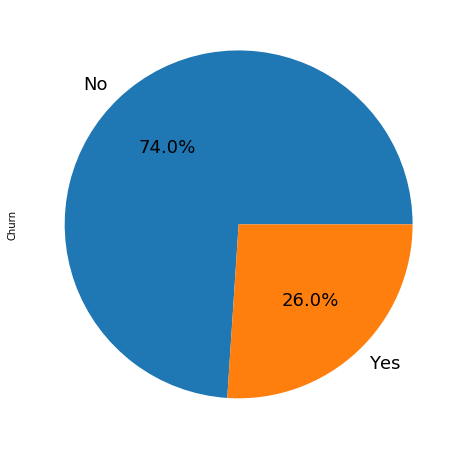

In [8]:
(data_train['Churn'].value_counts()*100.0 /len(data_train)).plot.pie(autopct='%.1f%%',figsize =(8,8), fontsize=18)

## Categorical variables

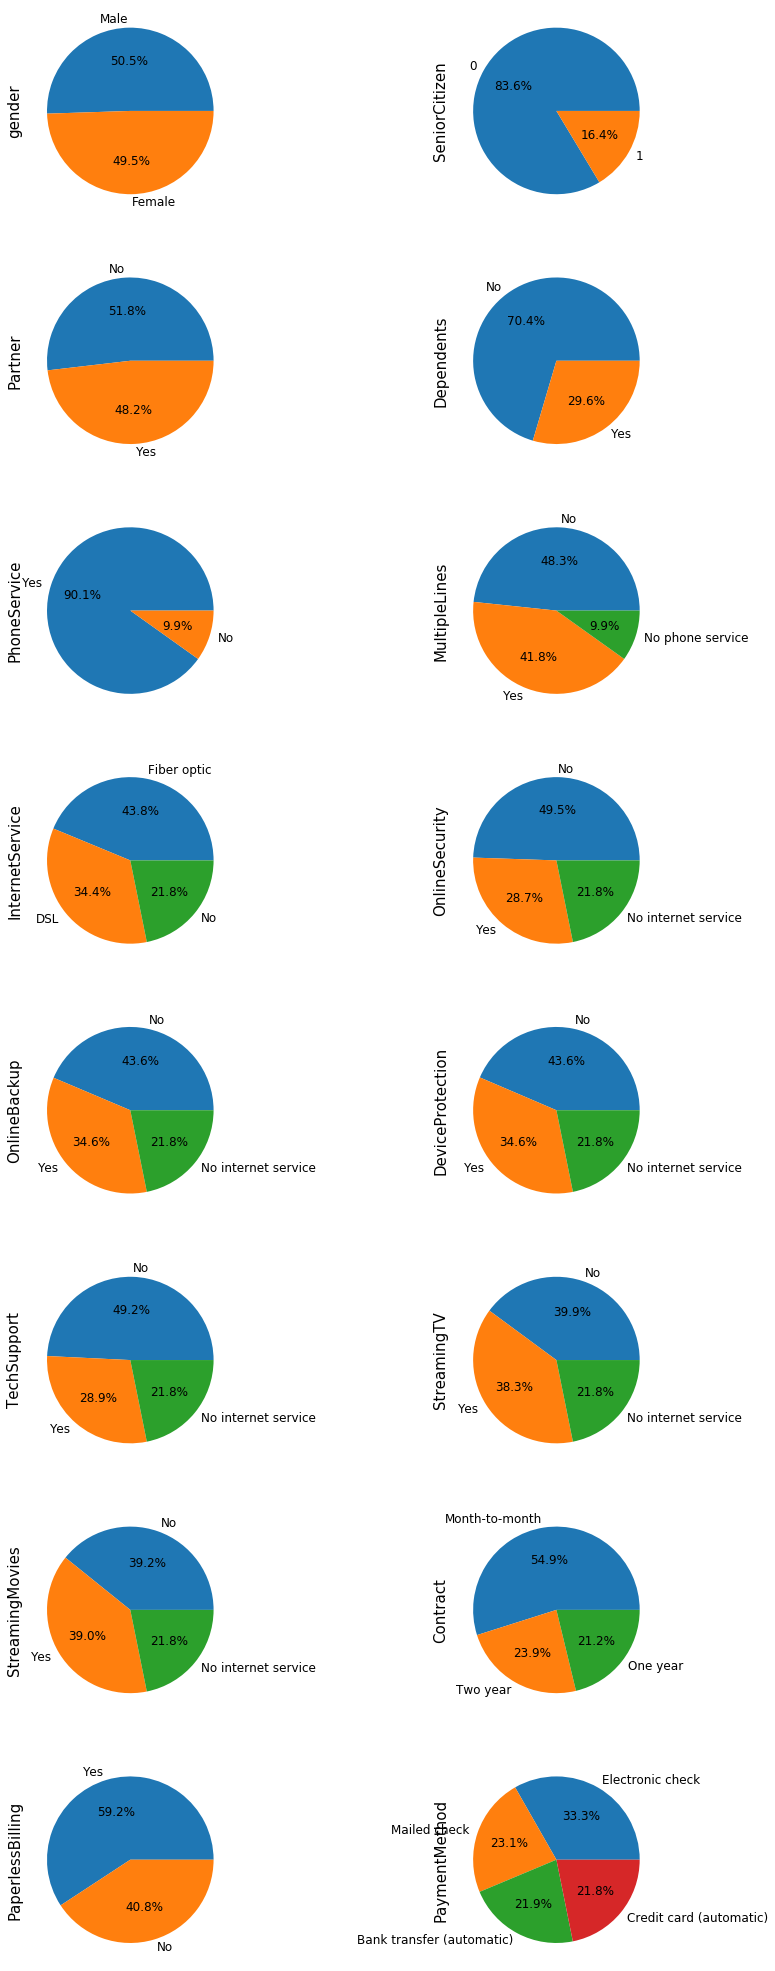

In [9]:
variables = np.delete(data_train.columns, [0, 5, 18, 19])
cat_eda(data_train, variables)

In [10]:
data_train.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    6132.000000  6132.000000     6132.000000   6132.000000
mean        0.163731    32.291422       64.630504   2272.941080
std         0.370062    24.441443       30.170374   2262.342901
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.150000    402.337500
50%         0.000000    29.000000       70.200000   1390.225000
75%         0.000000    55.000000       89.900000   3777.362500
max         1.000000    72.000000      118.650000   8684.800000

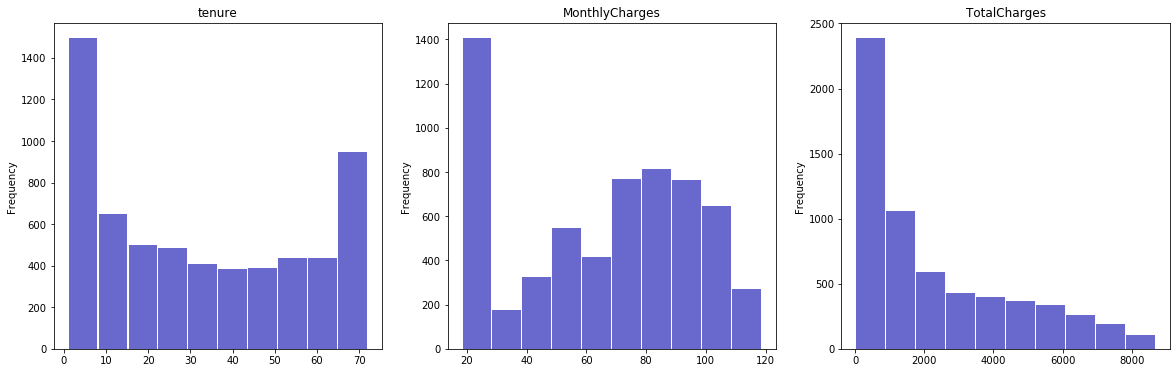

In [11]:
num_variables = np.array(['tenure', 'MonthlyCharges', 'TotalCharges'])
num_eda(data_train, num_variables)

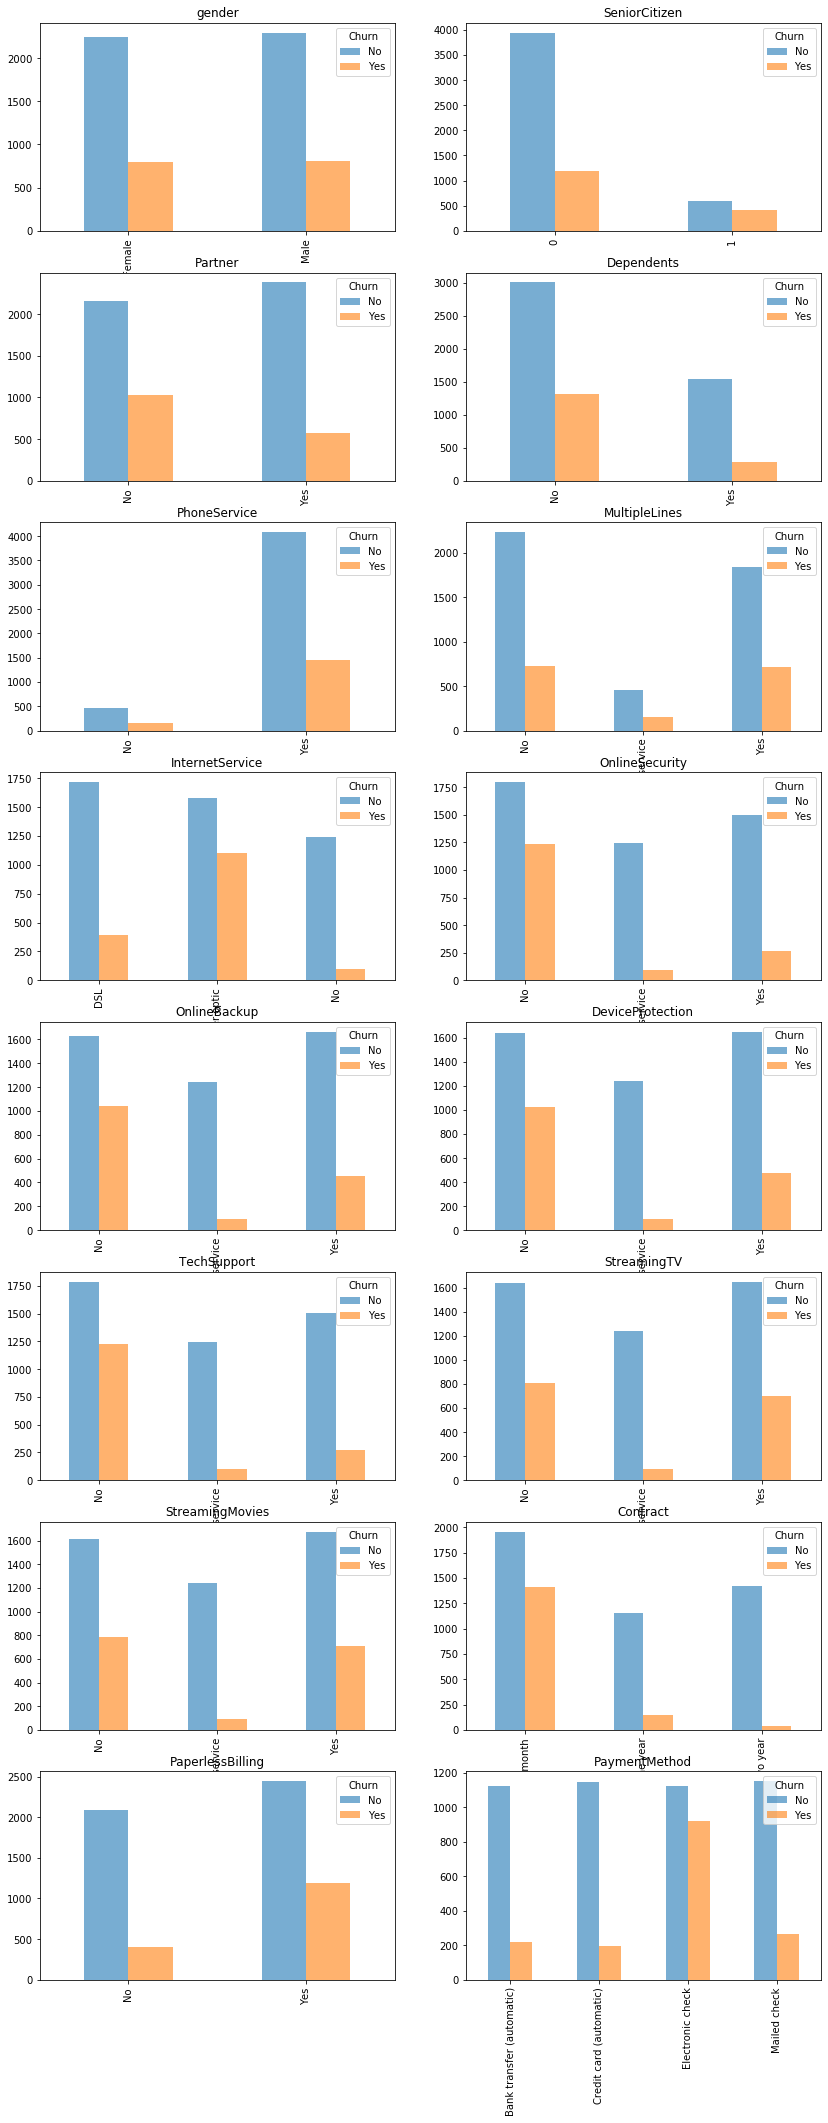

In [12]:
cat_targ(data_train, variables[:-1])

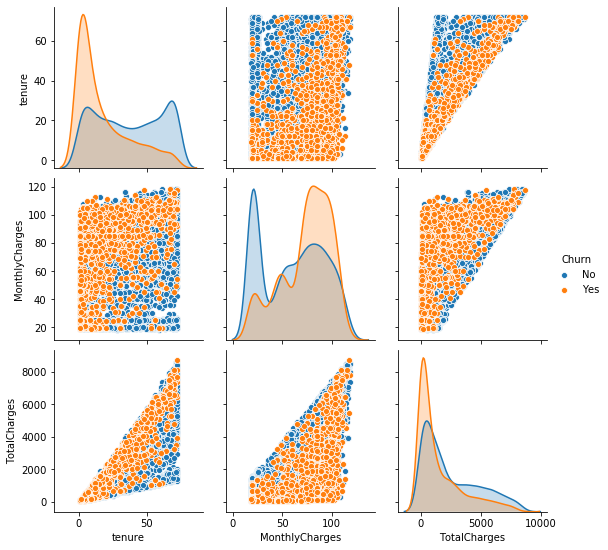

In [13]:
sns.pairplot(data_train, vars = num_variables, hue="Churn")

## Churn probability

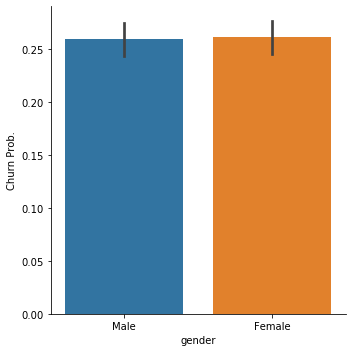

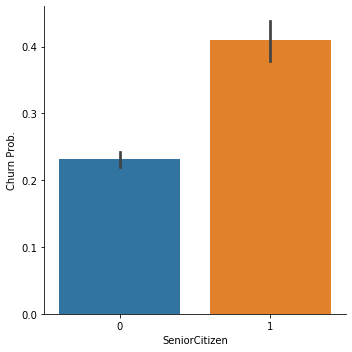

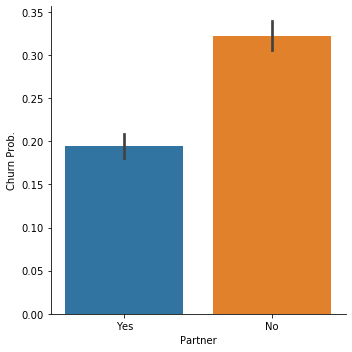

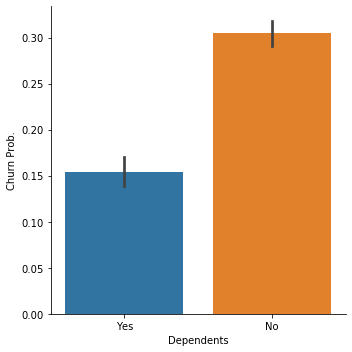

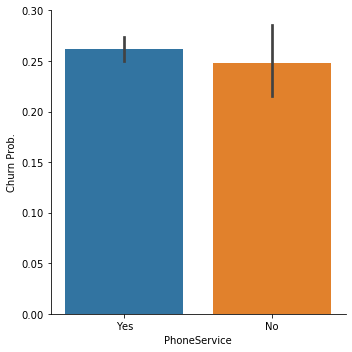

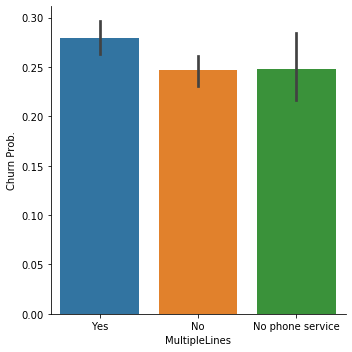

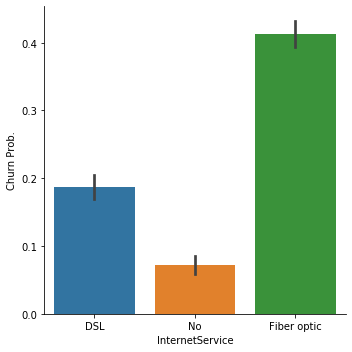

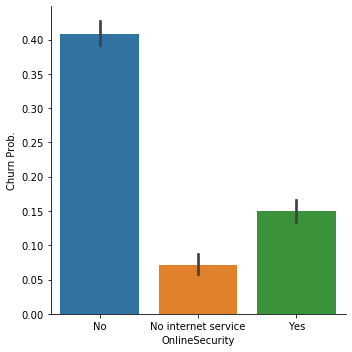

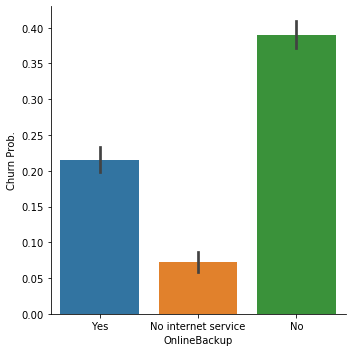

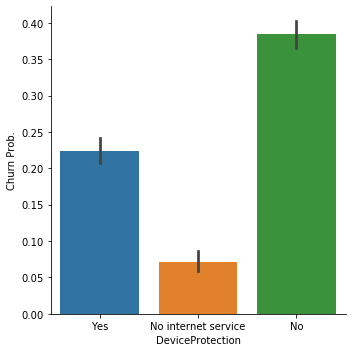

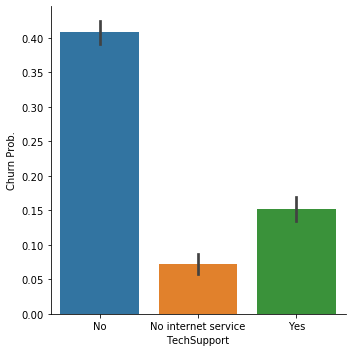

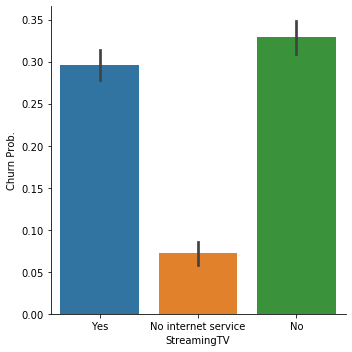

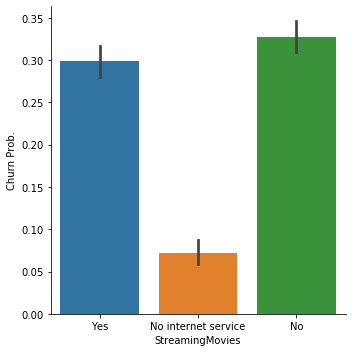

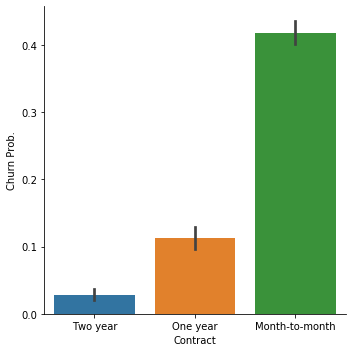

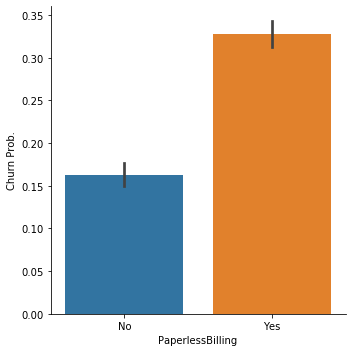

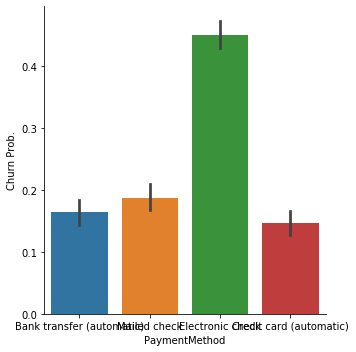

In [14]:
data_train['Churn'].replace({'Yes':1, 'No':0}, inplace=True)
for i in variables[:-1]:
    sns.catplot(x=i, y='Churn', kind='bar', data=data_train)
    plt.ylabel('Churn Prob.')

# Data Preprocessing

We'll transform the categorical variables as dummies.

In [15]:
df_model = modelling(df=data_train).var_dummies().sample(5)
df_model

tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  gender_Male  \
6038      20           60.00       1259.35      0              1            0   
1767      57           99.65       5497.05      0              1            0   
2666      36           20.00        666.75      0              0            1   
2592      46           45.20       2065.15      0              0            1   
3497       2           80.55        188.10      0              1            0   

      SeniorCitizen_No  SeniorCitizen_Yes  Partner_No  Partner_Yes  ...  \
6038                 0                  1           0            1  ...   
1767                 1                  0           0            1  ...   
2666                 1                  0           0            1  ...   
2592                 1                  0           1            0  ...   
3497                 1                  0           1            0  ...   

      StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
6038                    1                        1                  0   
1767                    1                        1                  0   
2666                    0                        0                  1   
2592                    0                        1                  0   
3497                    0                        1                  0   

      Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
6038                  0                    0                     1   
1767                  0                    0                     1   
2666                  0                    1                     0   
2592                  0                    0                     1   
3497                  0                    1                     0   

      PaymentMethod_Bank transfer (automatic)  \
6038                                        0   
1767                                        0   
2666                                        0   
2592                                        0   
3497                                        0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
6038                                      0                               1   
1767                                      0                               1   
2666                                      0                               0   
2592                                      1                               0   
3497                                      1                               0   

      PaymentMethod_Mailed check  
6038                           0  
1767                           0  
2666                           1  
2592                           0  
3497                           0  

[5 rows x 47 columns]

## Transform scaler

Split in features ```X``` and target ```y``` and transform with a scaler.

In [16]:
X, y = modelling(df=data_train, preproc_scaler = preprocessing.MinMaxScaler).transform_data(feature_range=(0,1))

## Define models to test

In [17]:
class_models = {"Logistic Reg.":linear_model.LogisticRegression,
             "Grad. Boosting":ensemble.GradientBoostingClassifier,
             "Rand. Forest":ensemble.RandomForestClassifier,
             "SVM":svm.SVC,
             "KNeig":neighbors.KNeighborsClassifier}

### See the accuracy score per model

In [18]:
for name, model in class_models.items():
    acc_score = metrics.accuracy_score(y,
                                       modelling(df=data_train,
                                       classif=model,
                                       preproc_scaler=preprocessing.MinMaxScaler).strat_cross_val())
    print("{} : {:,.3f}".format(name, acc_score))

Logistic Reg. : 0.785
Grad. Boosting : 0.803
Rand. Forest : 0.792
SVM : 0.782
KNeig : 0.763


### Classification report per model

In [19]:
for name, model in class_models.items():
    class_report = metrics.classification_report(y,
                                                 modelling(df=data_train,
                                                 classif=model,
                                                 preproc_scaler=preprocessing.MinMaxScaler).strat_cross_val())
    print("{} \n {} \n".format(name, class_report))

Logistic Reg. 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      4535
           1       0.61      0.49      0.54      1597

    accuracy                           0.78      6132
   macro avg       0.72      0.69      0.70      6132
weighted avg       0.77      0.78      0.78      6132
 

Grad. Boosting 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      4535
           1       0.66      0.51      0.57      1597

    accuracy                           0.80      6132
   macro avg       0.75      0.71      0.72      6132
weighted avg       0.79      0.80      0.79      6132
 

Rand. Forest 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      4535
           1       0.65      0.48      0.55      1597

    accuracy                           0.80      6132
   macro avg       0.74      0.70      0.71      6132
weighted avg       0.7

In [20]:
#for name, model in class_models.items():
#    conf_matrix = metrics.confusion_matrix(y, ml_models(X, y, model).strat_cross_val())
#    sns.heatmap(conf_matrix, annot=True,  fmt='');
#    plt.title(name);

In [21]:
gbc = class_models['Grad. Boosting']()
gbc.fit(X, y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Variables relevance

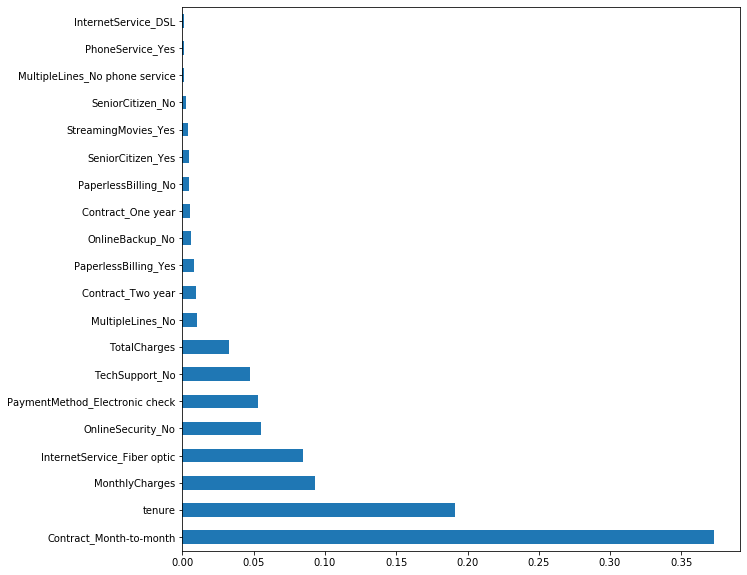

In [22]:
feature_importance = gbc.feature_importances_
#print (gbc.feature_importances_)
feat_importances = pd.Series(gbc.feature_importances_, index=df_model.drop(columns='Churn').columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh' , figsize=(10,10)) 

# Predict Churn for new users

In [23]:
my_sc = preprocessing.MinMaxScaler
X_pred = modelling(df=data_test, preproc_scaler=my_sc, target=False).transform_data()
y_hat = modelling(class_trained=gbc, target=False).predict_churn(X_pred)
df_pred = pd.concat([data_test, pd.DataFrame({'Churn': y_hat})], axis=1)
df_pred['Churn'].replace({1: 'Yes', 0: 'No'}, inplace=True)
df_pred.sample(8)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
281        8281  Female              0      No         No      27   
48         8048    Male              1     Yes         No      70   
705        8705    Male              0     Yes         No      49   
288        8288  Female              0      No         No      14   
314        8314  Female              0     Yes         No      69   
363        8363  Female              0     Yes        Yes      71   
268        8268  Female              1      No         No      23   
893        8893  Female              0     Yes         No      14   

    PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
281          Yes            No             DSL                   No  ...   
48           Yes            No     Fiber optic                  Yes  ...   
705          Yes            No     Fiber optic                   No  ...   
288          Yes            No     Fiber optic                   No  ...   
314          Yes           Yes              No  No internet service  ...   
363          Yes           Yes     Fiber optic                  Yes  ...   
268          Yes           Yes     Fiber optic                   No  ...   
893          Yes           Yes             DSL                  Yes  ...   

        DeviceProtection          TechSupport          StreamingTV  \
281                  Yes                  Yes                  Yes   
48                   Yes                   No                  Yes   
705                  Yes                  Yes                  Yes   
288                   No                   No                   No   
314  No internet service  No internet service  No internet service   
363                  Yes                   No                  Yes   
268                  Yes                   No                   No   
893                   No                   No                  Yes   

         StreamingMovies        Contract PaperlessBilling  \
281                  Yes        One year               No   
48                   Yes        Two year               No   
705                  Yes        One year              Yes   
288                   No  Month-to-month              Yes   
314  No internet service        Two year              Yes   
363                   No        Two year               No   
268                   No  Month-to-month              Yes   
893                   No  Month-to-month              Yes   

                 PaymentMethod MonthlyCharges  TotalCharges  Churn  
281               Mailed check          78.20       2078.95     No  
48     Credit card (automatic)         105.35       7511.90     No  
705    Credit card (automatic)          99.25       4920.80     No  
288    Credit card (automatic)          71.00        914.00    Yes  
314    Credit card (automatic)          24.95       1718.35     No  
363  Bank transfer (automatic)         100.50       7030.65     No  
268               Mailed check          79.35       1835.30    Yes  
893  Bank transfer (automatic)          64.70        941.00     No  

[8 rows x 21 columns]

In [24]:
df_pred.to_csv('Predicted_set.csv')

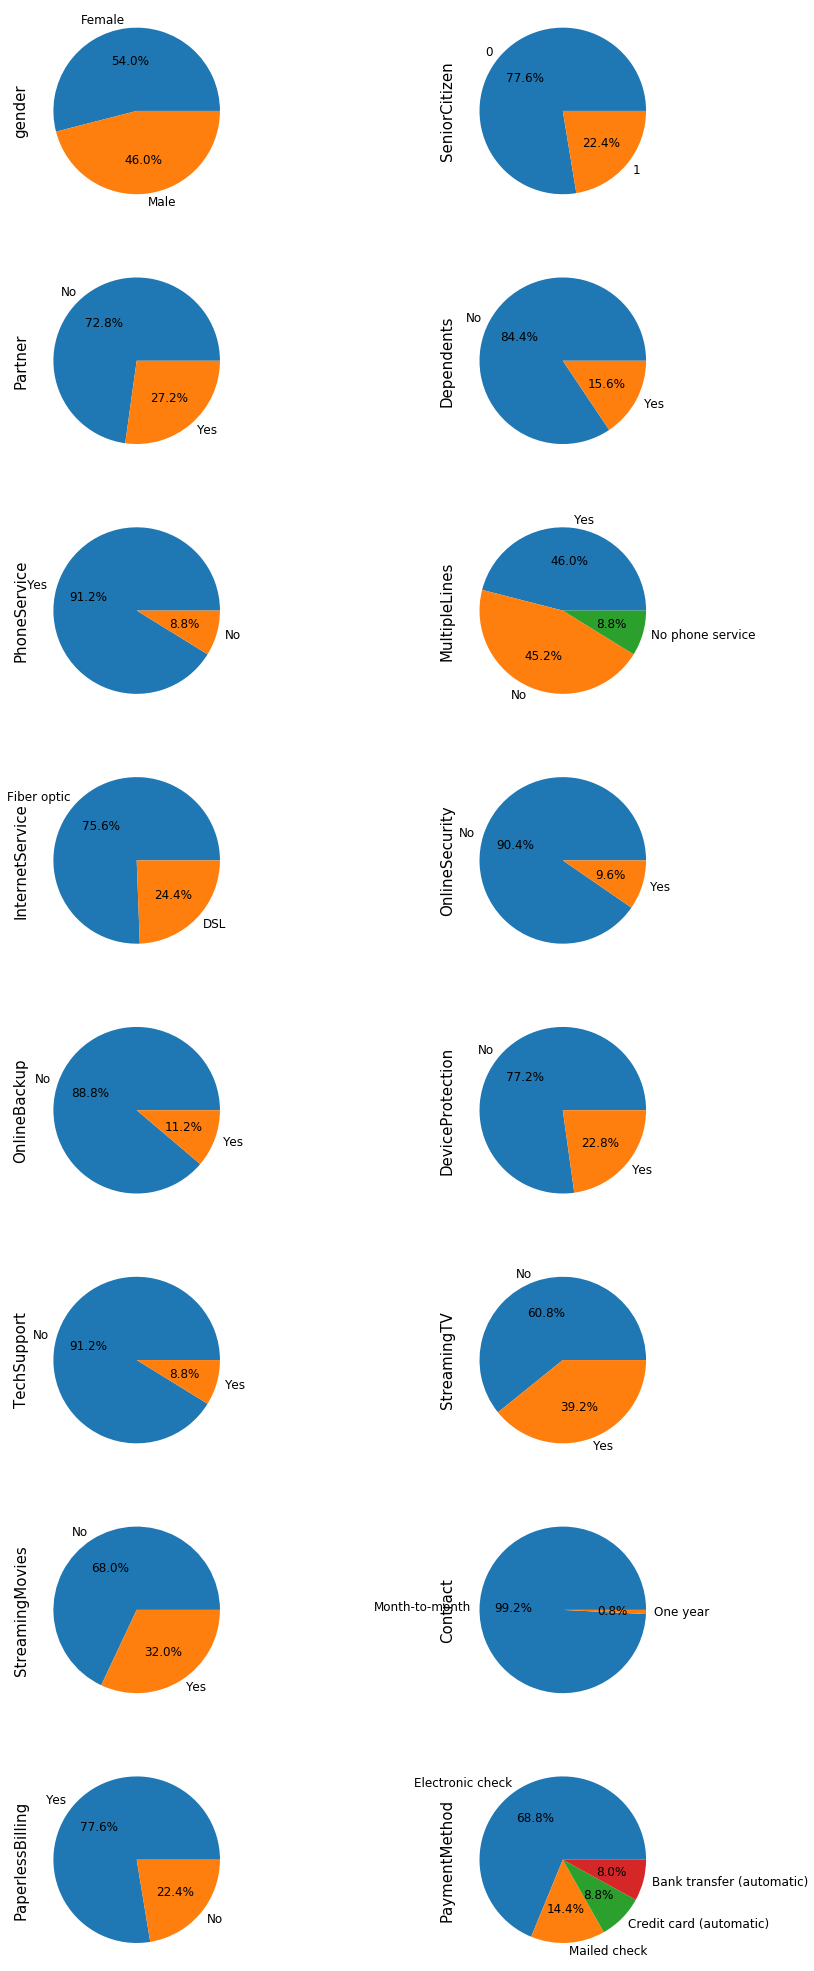

In [25]:
tmp = df_pred.loc[df_pred['Churn'] == 'Yes']
cat_eda(tmp, variables)

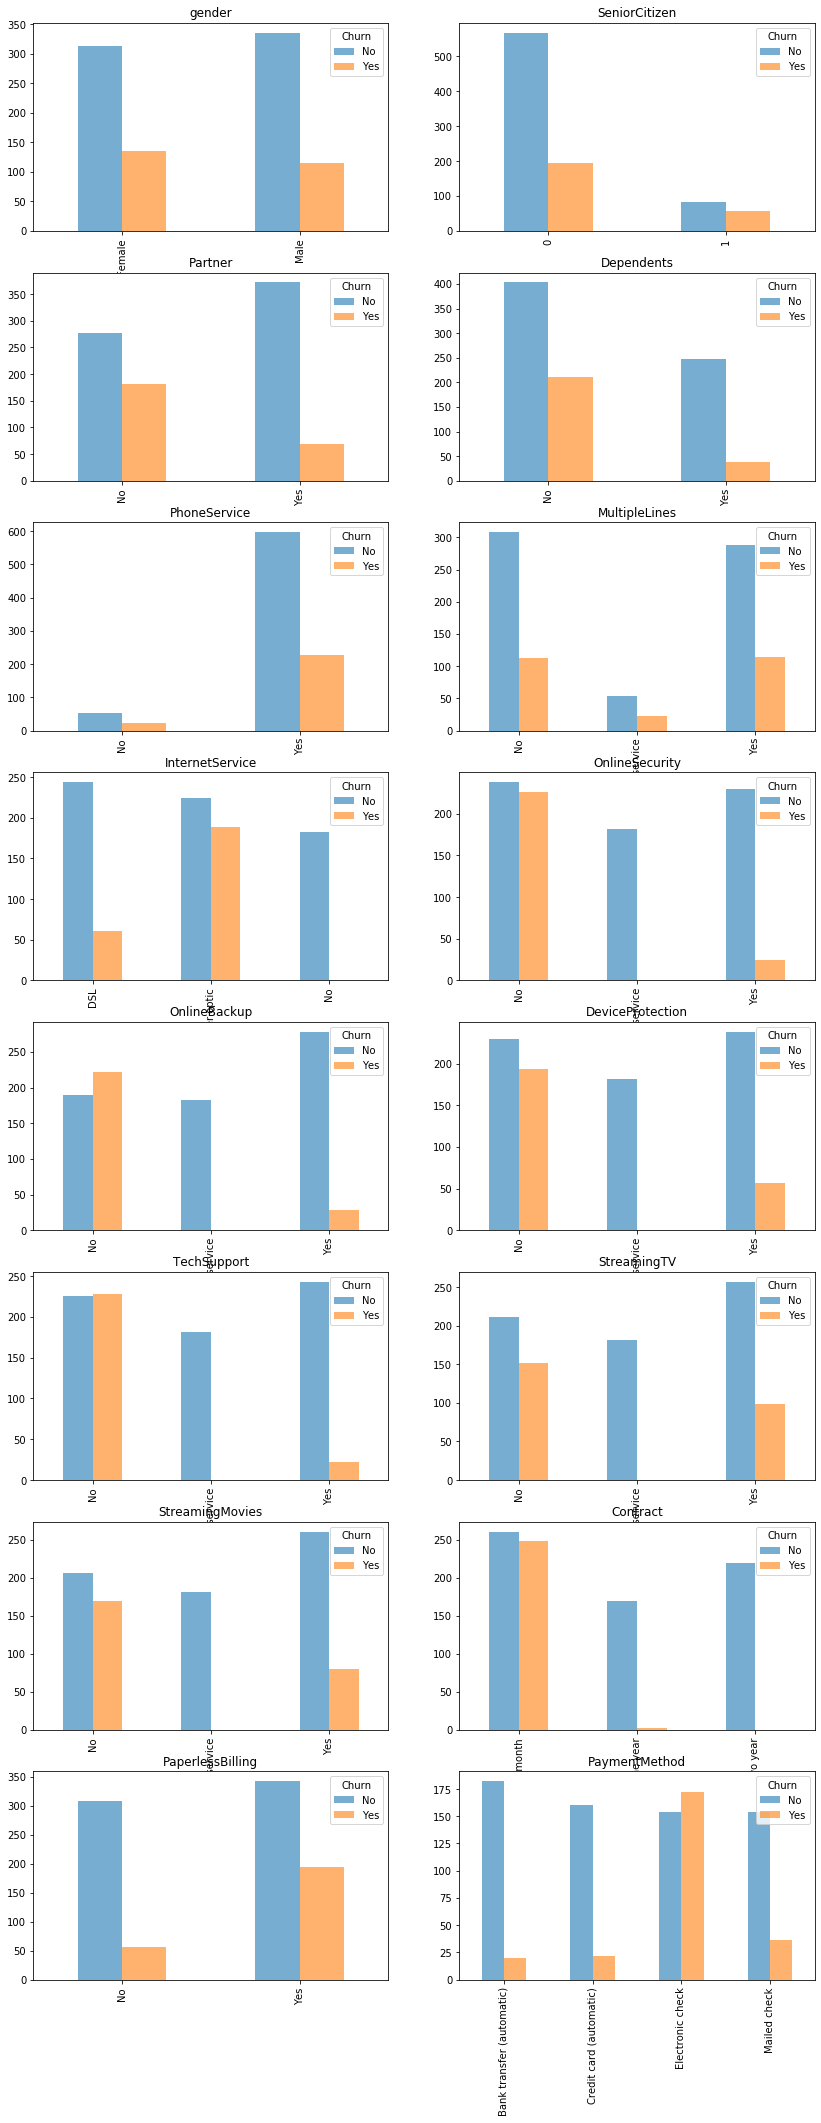

In [26]:
cat_targ(df_pred, variables[:-1])

In [27]:
tmp.MonthlyCharges.sum()

18535.899999999998

In [28]:
gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [35]:
with open('gbc_model.pkl', 'wb') as f:
        pickle.dump(gbc, f)

In [36]:
clf2 = joblib.load('gbc_model.pkl')